In [1]:
q = 4

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

##      Feature extraction
from skimage.feature import hog
from skimage.feature import *

##        Classifiers:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

In [3]:
###  ---READING TRAINING IMAGES--- ###

train = cv2.imread('./training/trs1.png') #Loading of training set
train2 = cv2.imread('./training/trs2.png') #Loading of training set
train3 = cv2.imread('./training/trs3.png') #Loading of training set

#image copies for contour drawing
train_sh = train.copy()
train_sh2 = train2.copy()
train_sh3 = train3.copy()

train = cv2.cvtColor(train, cv2.COLOR_RGB2GRAY)
train2 = cv2.cvtColor(train2, cv2.COLOR_RGB2GRAY)
train3 = cv2.cvtColor(train3, cv2.COLOR_RGB2GRAY)

(-0.5, 57.5, 1443.5, -0.5)

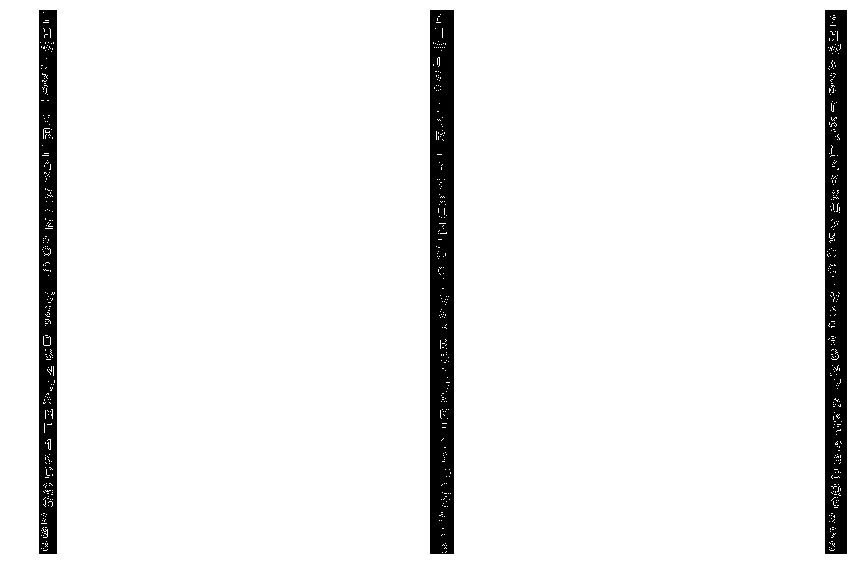

In [4]:
edged_train1 = cv2.Canny(train, 500, 500) # - Transformation of training image into binary image with the help of Canny edges. 
edged_train2 = cv2.Canny(train2, 500, 500)
edged_train3 = cv2.Canny(train3, 500, 500)

#Morphology - helps to get bold and contrast lines. See more in theoretical part of the report (IS IT RIGHT?)

fig = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
edged_train1 = cv2.morphologyEx(edged_train1, cv2.MORPH_CLOSE, fig)
edged_train2 = cv2.morphologyEx(edged_train2, cv2.MORPH_CLOSE, fig)
edged_train3 = cv2.morphologyEx(edged_train3, cv2.MORPH_CLOSE, fig)

#visualisation
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(edged_train1, cmap="gray")
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(edged_train2, cmap="gray")
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(edged_train3, cmap="gray")
plt.axis("off")

In [5]:
#Getting contours of data in test images (contours of each character stored there)
contrtrain1 = cv2.findContours(edged_train1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contrtrain1 = contrtrain1[0]

contrtrain2 = cv2.findContours(edged_train2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contrtrain2 = contrtrain2[0]

contrtrain3 = cv2.findContours(edged_train3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contrtrain3 = contrtrain3[0]

#Visualisation of contours
for contour in contrtrain1:
    rect = cv2.minAreaRect(contour)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(train_sh,[box],0,(0,255,0),1)

#Visualisation of contours
for contour in contrtrain2:
    rect = cv2.minAreaRect(contour)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(train_sh2,[box],0,(0,255,0),1)

#Visualisation of contours
for contour in contrtrain3:
    rect = cv2.minAreaRect(contour)
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(train_sh3,[box],0,(0,255,0),1)

    
#Labels for training data
labels = ['3', '9', '2', 'G', '2', 'D', '8', '1', 'F', 'M', 'A', '7', 'N', 'S', 'B', 'P', '6', 'V', 'I', 'C', 'O', '5', 'Z', 'U', 'X', 'Y', '4', 'L', 'R', 'K', 'T', '0', '3', 'J', 'W', 'H', 'E', '3', '9', '2', 'G', '2', 'D', '8', '1', 'F', 'M', 'A', '7', 'N', 'S', 'B', 'P', '6', 'V', 'I', 'C', 'O', '5', 'Z', 'U', 'X', 'Y', '4', 'L', 'R', 'K', 'T', '0', '3', 'J', 'W', 'H', 'E', '3', '9', '2', 'G', '2', 'D', '8', '1', 'F', 'M', 'A', '7', 'N', 'S', 'B', 'P', '6', 'V', 'I', 'C', 'O', '5', 'Z', 'U', 'X', 'Y', '4', 'L', 'R', 'K', 'T', '0', '3', 'J', 'W', 'H', 'E']
hogs_features_train = []
hogs_features_test = []

#Finds space which each character takes on image and then uses it as a mask to cut out piece with character from training image
def hogex(contrtrain, edged_train):
    for c in contrtrain:
        (x, y, w, h) = cv2.boundingRect(c) #Finds x,y-position of center of the contour
        roi = edged_train[y:y + h, x:x + w] #Finds region of interest, which is place taken by character
        roi = cv2.resize(roi,(27,46),interpolation = cv2.INTER_AREA) #Applies mask and cuts out a piece with character
        #Feature extraction by histograms of oriented gradients. More info in report.
        hogs_features_train.append(hog(roi, orientations=9, pixels_per_cell=(q, q), cells_per_block=(1, 1), visualize=False))

hogex(contrtrain1,edged_train1)
hogex(contrtrain2,edged_train2)
hogex(contrtrain3,edged_train3) 

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


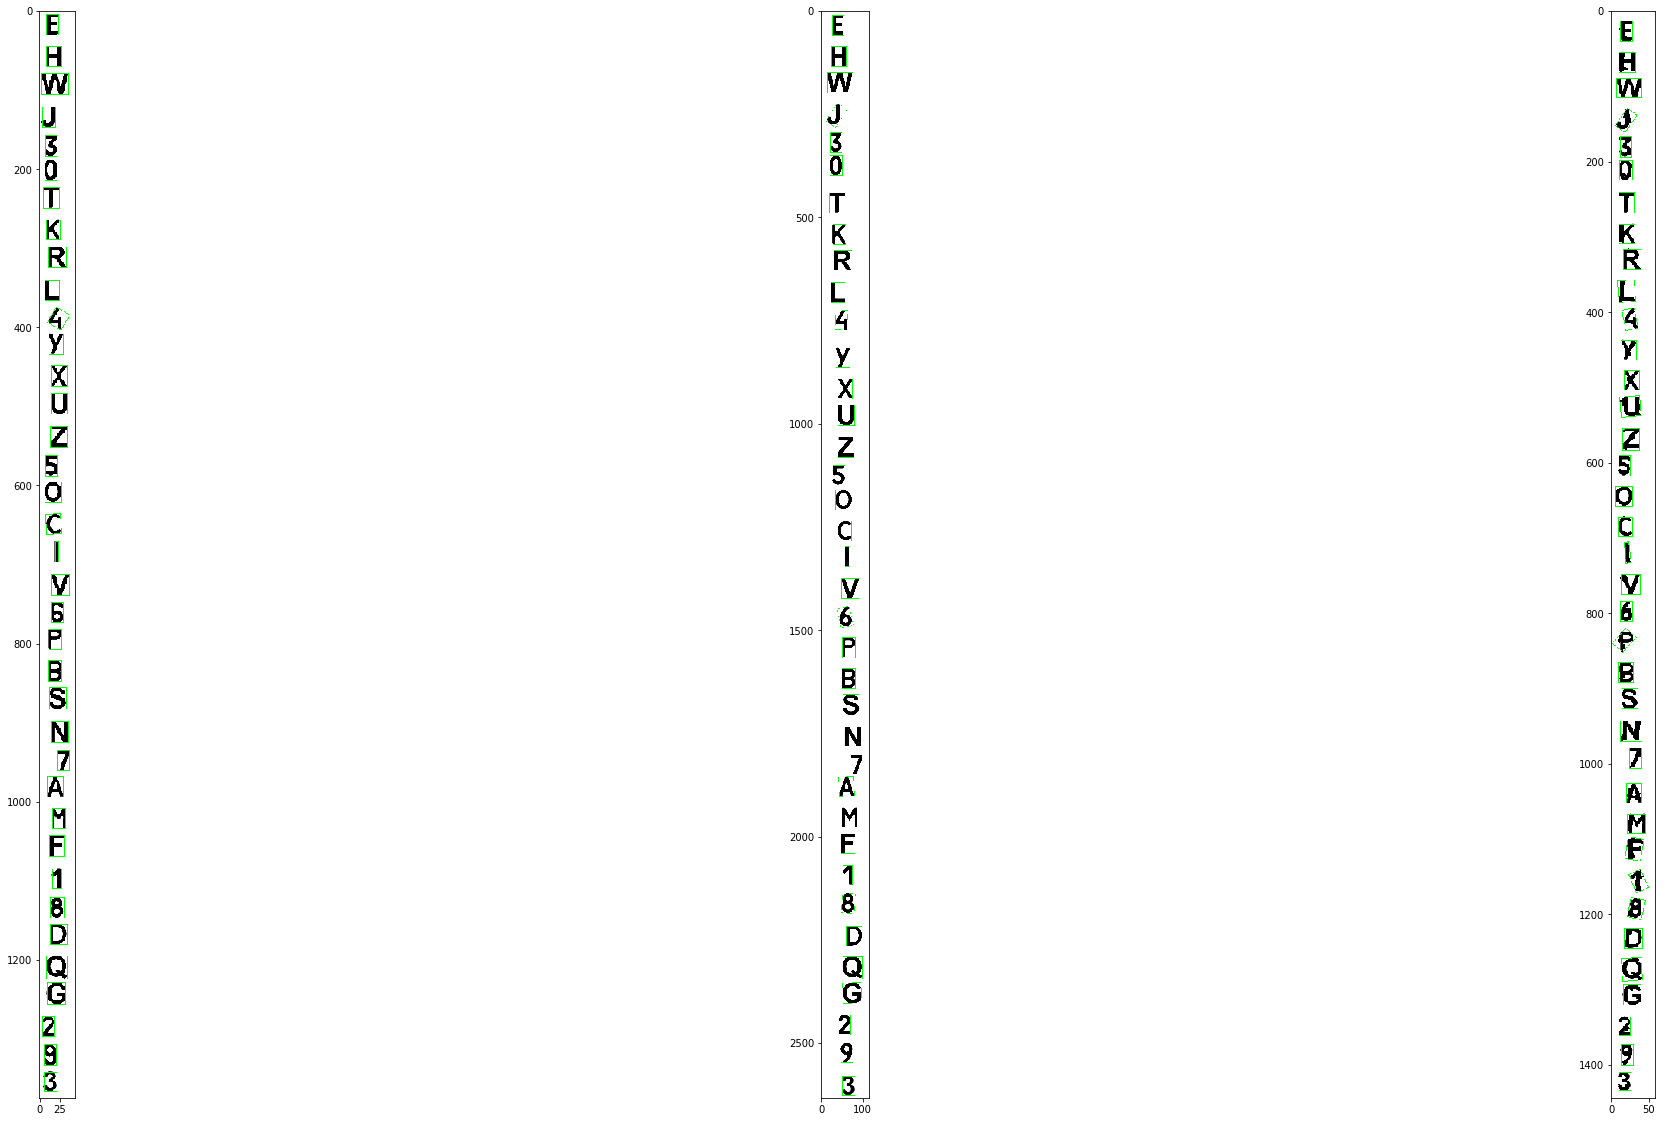

In [6]:
plt.figure(figsize=(40,20))
plt.subplot(1,3,1)
plt.imshow(train_sh)
plt.subplot(1,3,2)
plt.imshow(train_sh2)
plt.subplot(1,3,3)
plt.imshow(train_sh3)

(-0.5, 639.5, 479.5, -0.5)

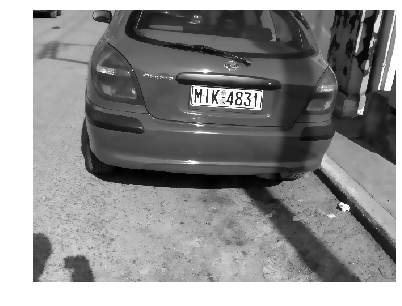

In [7]:
###  ---READING--- ###

img = cv2.imread("./Datasets/DatasetFinal/124.jpg") #sucess



img1 = img.copy()
img2 = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#equalize hist
#img = cv2.equalizeHist(img)

#bilateral Filter for removing noise
img = cv2.bilateralFilter(img, 11, 17, 17)

#visualization
plt.figure(figsize=(10,5))
plt.imshow(img, cmap="gray")
plt.axis("off")

(-0.5, 639.5, 479.5, -0.5)

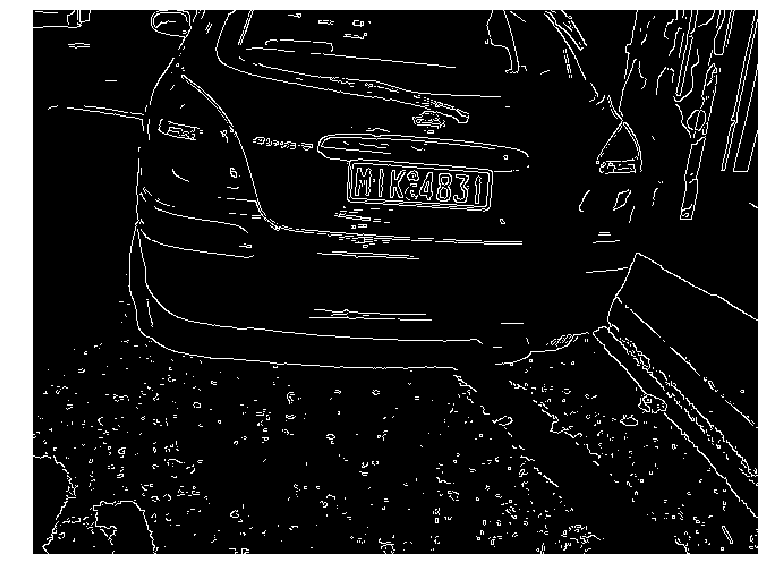

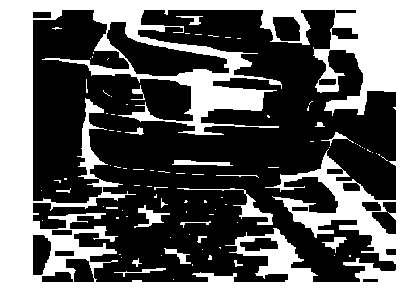

In [8]:
###  ---IMAGE enhancement--- ###

###  ---EDGE DETECTION--- ###

edged = cv2.Canny(img, 170, 200)
#edged = cv2.Canny(img,10,100)


#visualization
plt.figure(figsize=(20,10))
plt.imshow(edged, cmap="gray")
plt.axis("off")

###  ---MORPHOLOGY--- ###

#structuring element
#fig = cv2.getStructuringElement(cv2.MORPH_RECT,(16,4))
fig = cv2.getStructuringElement(cv2.MORPH_RECT,(26,8))


morph = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, fig)

#visualization
plt.figure(figsize=(10,5))
plt.imshow(morph, cmap="gray")
plt.axis("off")

In [9]:
###  ---FUNCTIONS--- ###

#function returns minimal area rectangle  properties for contour c
def conp(c):
    rect = cv2.minAreaRect(c) 
    (x,y) = (rect[0])
    (w,h) = (rect[1])
    a = rect[2]
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    return(x,y,w,h,a,box)

#function returns bounding rectangle  properties for contour c
def conpr(c):
    (x,y,w,h) = cv2.boundingRect(c) 
    return(x,y,w,h)

In [10]:
#function draws white filled rotated rectangle on the image
def draw_angled_rec(x0, y0, width, height, angle, x):

    
    ### draws rotated rectangle
    _angle = angle * math.pi / 180.0
    b = math.cos(_angle) * 0.5
    a = math.sin(_angle) * 0.5
    pt0 = (int(x0 - a * height - b * width),
           int(y0 + b * height - a * width))
    pt1 = (int(x0 + a * height - b * width),
           int(y0 - b * height - a * width))
    pt2 = (int(2 * x0 - pt0[0]), int(2 * y0 - pt0[1]))
    pt3 = (int(2 * x0 - pt1[0]), int(2 * y0 - pt1[1]))

    cv2.line(x, pt0, pt1, (255, 255, 255), 3)
    cv2.line(x, pt1, pt2, (255, 255, 255), 3)
    cv2.line(x, pt2, pt3, (255, 255, 255), 3)
    cv2.line(x, pt3, pt0, (255, 255, 255), 3)
    
    ### --> upper part of code in this cell is taken from stack overflow 
    
    #find contour with rectangle and fills it with white to create mask
    contours,hierarchy = cv2.findContours(x, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rect = cv2.minAreaRect(contours[0])
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(x,[box],0,(255,255,255),thickness=cv2.FILLED)

In [11]:
###  ---HIERARCHY FUNCTIONS--- ###

#function returns array with number of child contours for each contour (if f=True checks if child element height is smaller then width)
def childs(c,h,f):
    ch = [0 for i in range(len(c))]
    for i,co in enumerate(c):
        #filtering child elements  
        cond = True
        if f:
            (x1,y1,w1,h1) = conpr(co)
            if h1<w1:
                cond = False
        if  h[0][i][3]!=-1 and cond:
            ch[h[0][i][3]]+=1
            
    return ch

#function returns array with information about parent contour existence 1 - exist, 0 - not exist
def parents(c,h,f):
    p = [0 for i in range(len(c))]
    for i,co in enumerate(c):
        #filtering parent elements  
        cond = True
        if f:
            (x1,y1,w1,h1) = conpr(co)
            if h1<w1:
                cond = False
        if  h[0][i][3]!=-1 and cond:
            p[i]+=1
            
    return p

In [12]:
#returns mask for contour area extraction
def conm(c,i):
    (xo,yo,wo,ho,ao,b)=conp(c)
    mask = np.zeros(shape = i.shape, dtype = "uint8")
    draw_angled_rec(xo, yo, wo, ho, ao, mask)
    return mask


In [13]:
#rotates image 90deg to left (d=1) or to the right (d=-1)
def rot(i,d):
    r = np.zeros((i.shape[1],i.shape[0]))
    if d==1:
        for w in range(i.shape[0]):
            for h in range(i.shape[1]):
                r[h,w] = i[w,i.shape[1]-h-1]
    elif d==-1:
        for w in range(i.shape[0]):
            for h in range(i.shape[1]):
                r[h,w] = i[i.shape[0]-1-w,h]
    return r

In [14]:
#apply mask to image and rotate if needed (r=True) then extract only part with image

def m2i(m,i,r,isCharacter):
    
    #apply mask
    masked = cv2.bitwise_and(i,i,mask = m)
    
    #convert to grayscale if needed
    if len(i.shape)==3:
        masked = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)
    
    if r: #image will need rotation
        
        #finding bounding rectangle
        c = cv2.findContours(masked, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        rect = cv2.minAreaRect(c[0][0]) #>use external?

        (x,y,w,h,a,box) = conp(c[0][0])

        src_box = box.astype("float32")
        # box coord after rotating
        dst_box = np.array([[0, h-1],[0, 0], [w-1, 0], [w-1, h-1]], dtype="float32")

        # perspective transformation matrix
        M = cv2.getPerspectiveTransform(src_box, dst_box)
        (w,h) = (int(w),int(h))
        
        #  warp rotated rectangle
        test = cv2.warpPerspective(masked, M, (w,h))
        
        
        
        #rotate 90 degrees if h>w for number plate and rotate 90 degrees if w>h for character.
        if not isCharacter:
            if h>w:
                if a>0:
                    test = rot(test,-1)
                else:
                    test = rot(test,1)
        else:
            if w>h:
                if a>0:
                    test = rot(test,-1)
                else:
                    test = rot(test,1)    
                    
    #image dont need rotation             
    else:
        (x, y, w, h) = cv2.boundingRect(masked)
        test = np.zeros((w,h), dtype = "uint8")
        test = masked[y:y+h,x:x+w]
    
    return test
        


In [15]:
#debugging
# x = np.zeros(shape = img.shape, dtype = "uint8")
# draw_angled_rec(350,150,200,100,30,x)
# plt.imshow(cv2.bitwise_and(img1,img1,mask=x),cmap="gray")    #out = cv2.bitwise_and(i,i,mask = m)
# test = m2i(x,img1,False)
# plt.figure()
# plt.imshow(test,cmap="gray")

12
1st


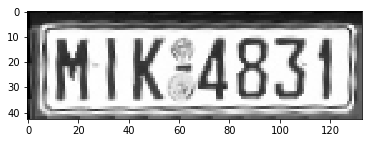

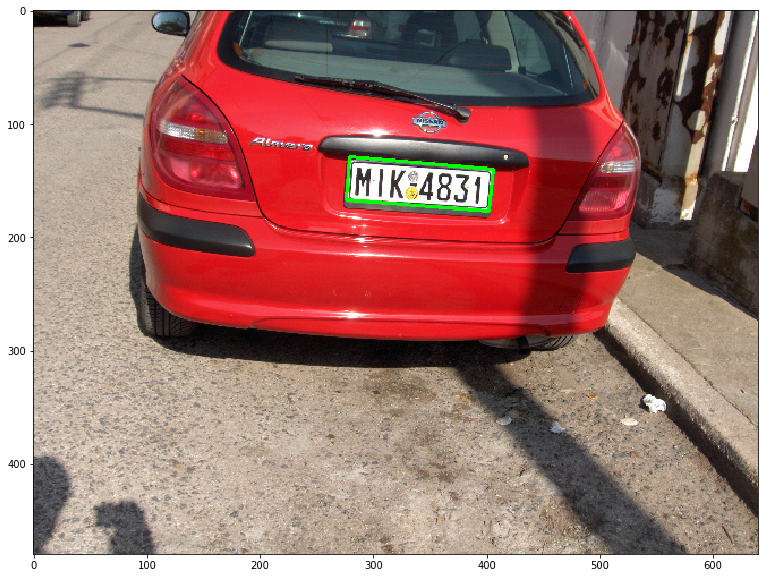

In [16]:
###  ---NP LOCALIZATION--- ###

contours,hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#output images ,should be one in ideal case
output = []

#succesfull recognition number for each contour throough the 1st filter
recogn = np.zeros(len(contours))

#extracting information about child elements

child = childs(contours,hierarchy,True)


#1st contour filter
for i,contour in enumerate(contours):
    
    #bounding and getting info from rect
    (xo,yo,wo,ho,ao,box)=conp(contour)
    (x,y,w,h)=conpr(contour)
    
    #image size
    isz = img.shape[0]*img.shape[1]

    #mask
    mask = conm(contour,img)
    size = np.count_nonzero(mask) 
    
    #masking morphologycal img
    test = cv2.bitwise_and(morph,morph,mask = mask)
    val = np.count_nonzero(test)
    
    #CONDITION!
    if  val>size*0.7 and size>isz*0.01 and size<0.5*isz and ((ao%90>=0 and ao%90<10) or (ao%90<=90 and ao%90>80)) and w>2*h and w<6*h and child[i]>0:
        #drawing contours
        print(child[i])
        cv2.drawContours(img1,[box],0,(0,255,0),2)
        print("1st")

        output.append(m2i(mask,img2,True,False))
        plt.figure()
        plt.imshow(m2i(mask,img2,True,False),cmap="gray")
        recogn[i]+=1 


#2nd contour filter    
for i,contour in enumerate(contours):
    
    #bounding and getting info from rect
    (xo,yo,wo,ho,ao,b) = conp(contour)
    (x,y,w,h)=conpr(contour)
    
    #image size
    isz = img.shape[0]*img.shape[1]

    #mask
    mask = conm(contour,img)
    size = np.count_nonzero(mask) 
    
    #masking morphologycal img
    test = cv2.bitwise_and(morph,morph,mask = mask)
    val = np.count_nonzero(test)

    if val>size*0.6 and recogn[i] == 0  and size>isz*0.01 and size<0.5*isz and ((ao%90>=0 and ao%90<10) or (ao%90<=90 and ao%90>80)) and w>2*h and w<6*h:
        cv2.drawContours(img1,[box],0,(0,255,0),2)
        output.append(m2i(mask,img2,True,False))
        
        #masking
        mask = conm(contour,img)
        plt.figure()
        plt.imshow(m2i(mask,img2,True,False),cmap="gray")
        print("2nd")
   
    
#SHOW ALL CONTOURS
#     cv2.drawContours(img1,[box],0,(0,255,0),1)
        
#LIGHT CONTOUR FILTER
#     if aspect_ratio>2 and aspect_ratio<6  and ao >-5 and ao<5  and size>img.shape[0]*img.shape[1]*0.001:
#         cv2.drawContours(img1,[box],0,(0,255,0),2)


plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

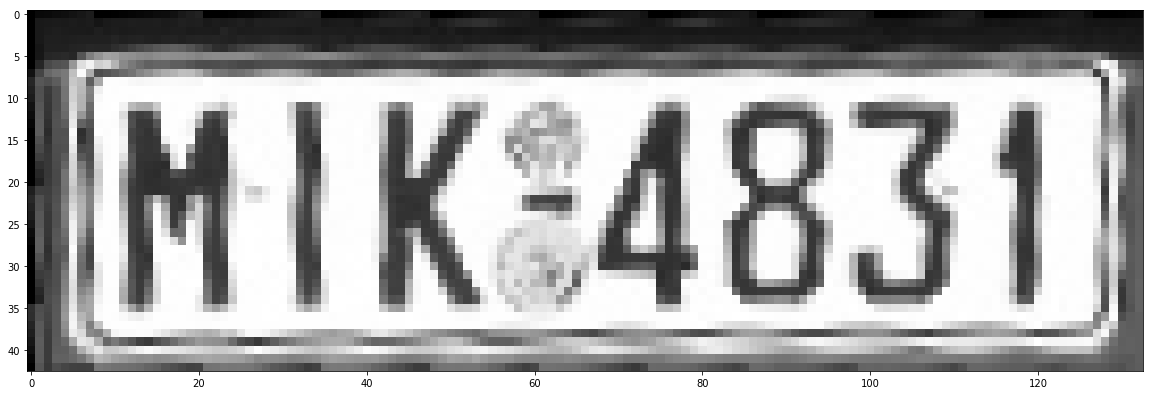

In [17]:
###  ---EXTRACTED NUMBER PLATE--- ###
for out in output:   
    plt.figure(figsize=(20,10))
    plt.imshow(out,cmap="gray")
    

out = np.uint8(output[0])

86.9221037241709


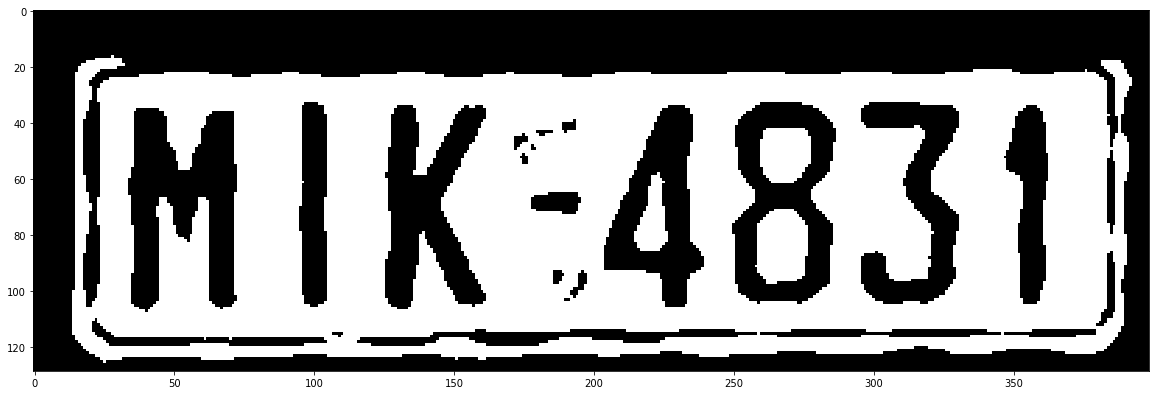

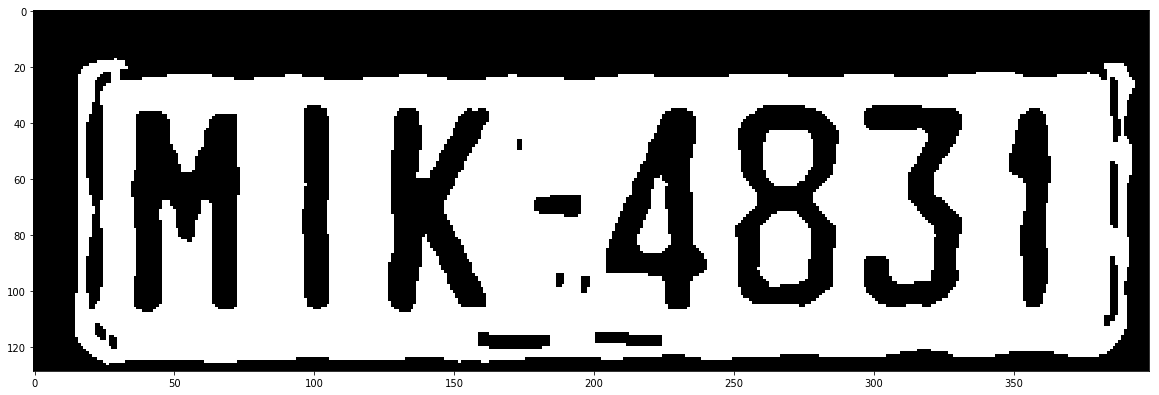

In [18]:
###  ---NP PROCESSING--- ###

mean = out.mean()
stdev = np.std(out)
out =  cv2.resize(out,(0,0), fx=3, fy=3)

print(stdev)
if stdev<60:
    ret,enp  = cv2.threshold(out,0.75*mean,1.25*mean,cv2.THRESH_BINARY)
if stdev>=60:
    ret,enp  = cv2.threshold(out,mean,1.1*mean,cv2.THRESH_BINARY)
# if mean>120:
#     ret,enp  = cv2.threshold(out,1.5*mean,1.6*mean,cv2.THRESH_BINARY)

#for comparing
plt.figure(figsize=(20,10))
plt.imshow(enp, cmap="gray")
 
#delete small particles
# kernel = np.ones((5,5),np.uint8)
# enp = cv2.morphologyEx(enp, cv2.MORPH_CLOSE, kernel)

#separate numbers in case they are connected
kernel = np.ones((4,2),np.uint8)
enp = cv2.morphologyEx(enp, cv2.MORPH_CLOSE, kernel)


#make thiscker
# kernel = np.ones((8,8),np.uint8)
# erosion = cv2.dilate(img,kernel,iterations = 2)
# fig = cv2.getStructuringElement(cv2.MORPH_CROSS,(1,1))
# enp = cv2.morphologyEx(enp, cv2.MORPH_CLOSE, fig)

#rect morphology
# fig = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
# enp = cv2.dilate(enp,kernel,iterations = 1)


plt.figure(figsize=(20,10))
plt.imshow(enp, cmap="gray")

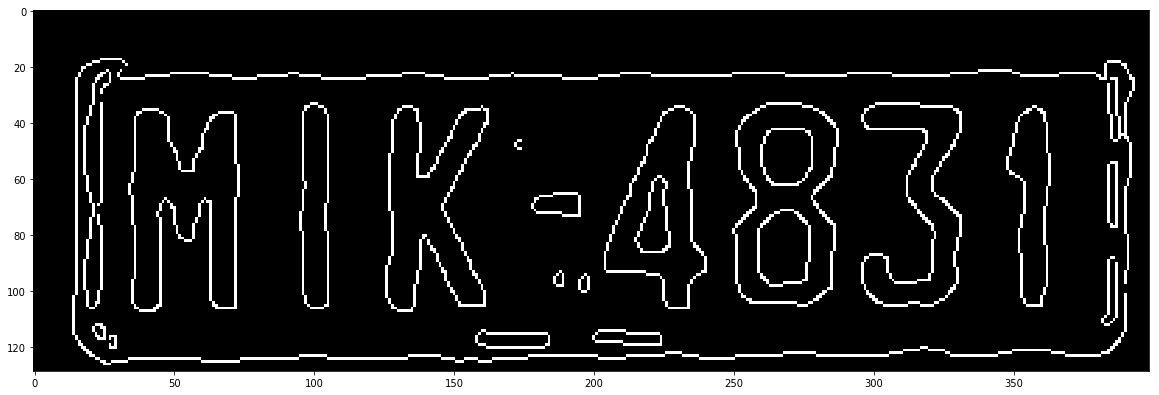

In [19]:
###  ---NP EDGE DETECTION--- ###
edged_test = cv2.Canny(enp, 10, 10)
plt.figure(figsize=(20,10))
plt.imshow(edged_test, cmap="gray")

height  110
height  7
height  7
height  8
height  8
height  8
height  7
height  27
height  10
height  26
height  6
height  74
height  73
height  74
height  28
height  75
height  74
height  74
height  27
height  20
height  75
height  25
height  87


(-0.5, 398.5, 128.5, -0.5)

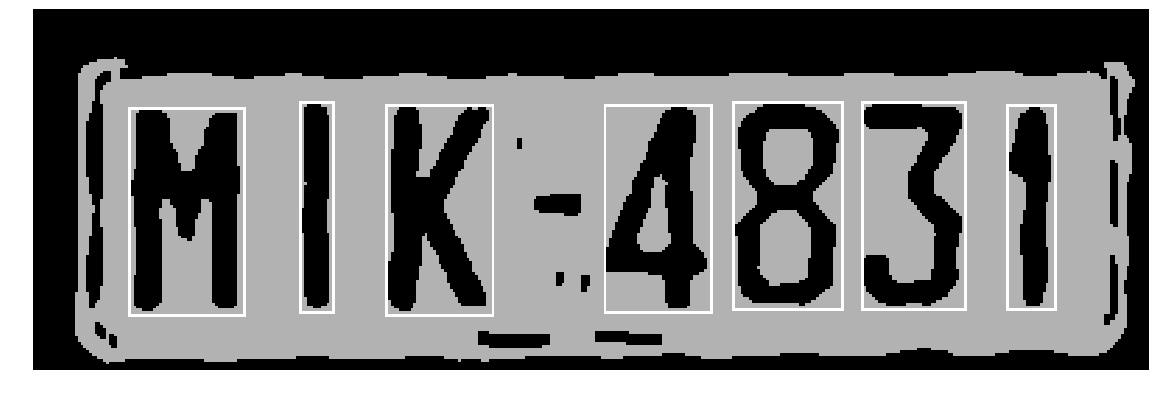

In [20]:
###  ---CHARACTER LOCALIZATION--- ###

defrag=[]


contours,hier = cv2.findContours(enp, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# parent = parents(contours,hier,False) 
# child = childs(contours,hier,False)

imgcl = enp.copy()


ys = []
hs = []
#calculation of approximate heigh on which character are located
for c in contours:
    #filtering out contours which for sure aren't characters
    (x,y,w,h) = conpr(c) 
    if w*h>10 and h>w: 
        ys.append(y)
    if w*h>500 and h>w:
        hs.append(h)

        

ym = np.median(ys)
hm = np.median(hs)
error = ym*0.40
error1 = hm*0.25

ims = imgcl.shape[0]*imgcl.shape[1]
#xs array for recognizing character sequence order
xs = []




for i,c in enumerate(contours):

    (x,y,w,h) = conpr(c)
    print("height ",h)
    if h*w>ims*0.005 and h>w and y>ym-error and y<ym+error and h>hm-error1 and h<hm+error1:
        cv2.rectangle(imgcl,(x,y),(x+w,y+h),(255,255,255),1)
        xs.append(x)

        #character is added to defrag array
        mask = conm(c,out)
        test = cv2.bitwise_and(edged_test,edged_test,mask = mask)
        test = m2i(mask,edged_test,False,True) 
        defrag.append(test)
    
    
plt.figure(figsize=(20,10))
plt.imshow(imgcl, cmap="gray")
plt.axis("off")

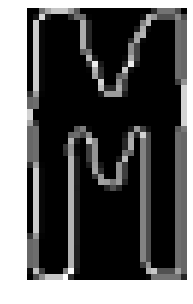

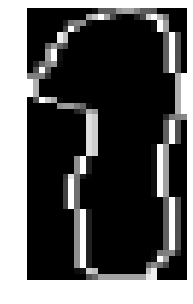

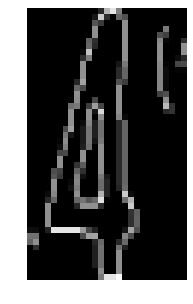

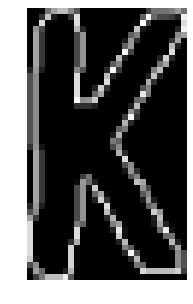

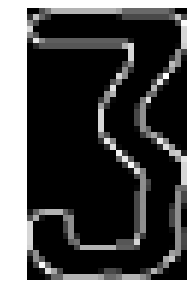

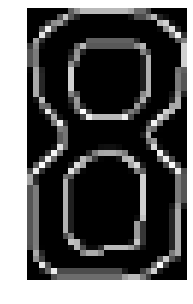

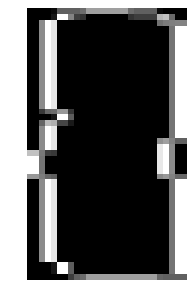

In [21]:
###  ---EXTRACTED CHARACTERS--- ###
for i in defrag:
    i = cv2.resize(i,(27,46),interpolation = cv2.INTER_AREA)
    #fig = cv2.getStructuringElement(cv2.MORPH_RECT,(6,6))
    #i = cv2.morphologyEx(i, cv2.MORPH_CLOSE, fig)
    hogs_features_test.append(hog(i, orientations=9, pixels_per_cell=(q, q), cells_per_block=(1, 1), visualize=False))     
    plt.figure(figsize=(10,5))
    plt.imshow(i, cmap="gray")
    plt.axis("off")

In [22]:
#Application of classifiers
clfs = [KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),BernoulliNB(),LinearSVC()]
anss = []
print(np.shape(hogs_features_train))
for clf in clfs:
    clf.fit(hogs_features_train,labels)
    ans = clf.predict(hogs_features_test)
    anss.append(ans)
    print(ans)

(111, 594)
['M' 'V' 'A' 'K' '3' '8' 'I']
['M' '2' '2' 'K' '3' '8' '2']
['H' 'I' 'M' 'W' 'V' 'V' 'I']
['M' 'I' '1' 'K' '3' '8' 'I']
['M' 'I' 'A' 'K' '3' '8' 'I']


In [23]:
#Sorting of characters so they match their positions on test image
indexes = [i for i in range(len(xs))]
newmat = np.column_stack([xs,indexes])
newmat = newmat[newmat[:,0].argsort()]
indexes = newmat[:,1]

ans_2 = ans.copy()
for i in range(len(ans)):
    ans_2[i]=ans[indexes[i]]
#Final answer
print(ans_2)

['M' 'I' 'K' 'A' '8' '3' 'I']
